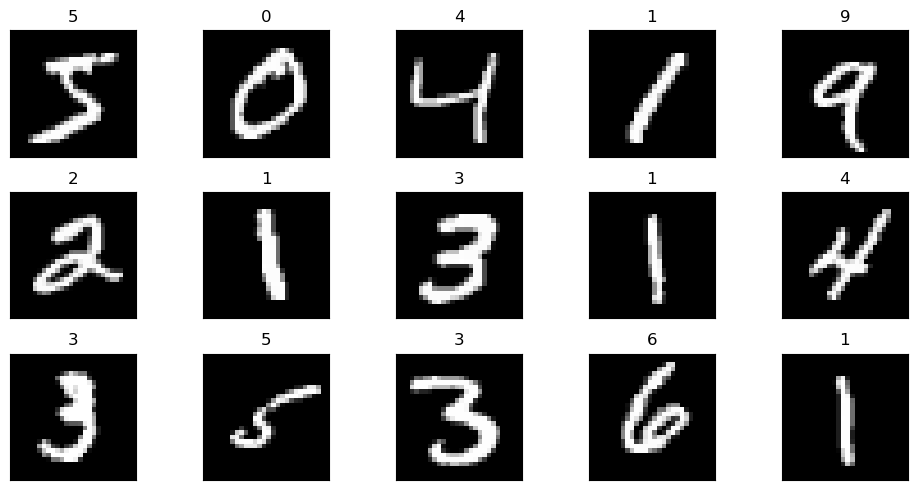

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8810 - loss: 1.0566 - val_accuracy: 0.9835 - val_loss: 0.0618
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9803 - loss: 0.0663 - val_accuracy: 0.9850 - val_loss: 0.0487
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9857 - loss: 0.0473 - val_accuracy: 0.9822 - val_loss: 0.0577
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9877 - loss: 0.0404 - val_accuracy: 0.9842 - val_loss: 0.0584
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9894 - loss: 0.0334 - val_accuracy: 0.9893 - val_loss: 0.0424
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9846 - loss: 0.0557
Test Accuracy:  0.988


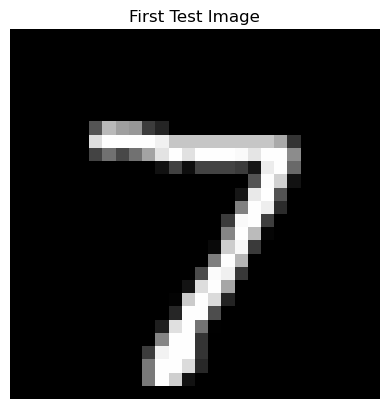

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicted Digit for the first test image: 7


In [61]:
import tensorflow as tf
from tensorflow.keras import layers,models # Import necessary Keras layers and models
import matplotlib.pyplot as plt # Import matplotlib for plotting

# Load the MNIST dataset from Keras. This dataset contains 60,000 training images
# and 10,000 testing images of handwritten digits (0-9).
# X_train, X_test store the image data (features).
# y_train, y_test store the corresponding digit labels (targets).
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display the MNIST dataset object (mostly for introspection, not directly used)
mnist

# Print the shapes of the training and testing feature sets
# X_train.shape will typically be (60000, 28, 28) for 60,000 28x28 grayscale images.
X_train.shape
# y_train.shape will typically be (60000,) for 60,000 corresponding labels.
y_train.shape
# X_test.shape will typically be (10000, 28, 28) for 10,000 28x28 grayscale images.
X_test.shape

# Create a new figure with a specified size (width=10 inches, height=5 inches)
# This provides enough space for displaying multiple images clearly.
plt.figure(figsize=(10,5))

# Loop through the first 15 images of the training dataset
for i in range(15):
    # Create a subplot within a 3x5 grid.
    # i+1 determines the position of the current subplot (1st to 15th).
    plt.subplot(3,5,i+1)
    # Display the i-th training image.
    # cmap='gray' ensures the grayscale image is displayed in shades of gray.
    plt.imshow(X_train[i], cmap='gray')
    # Set the title of the current subplot to the corresponding label (digit).
    plt.title(f"{y_train[i]}")
    # Turn off the axis ticks for cleaner visualization.
    plt.xticks([])
    plt.yticks([])
plt.tight_layout() # Adjust subplot parameters for a tight layout
plt.show() # Display the figure with all the subplots

# Reshape the training images to add a channel dimension.
# CNNs expect input shape like (batch_size, height, width, channels).
# -1 automatically calculates the batch size (number of images).
# 28, 28 are height and width.
# 1 indicates a single channel (grayscale).
# .astype(float) converts pixel values to float, necessary for neural network computations.
X_train = X_train.reshape(-1, 28, 28, 1).astype(float) #[0,1] - Note: actual scaling to [0,1] is usually done by dividing by 255.0
X_test = X_test.reshape(-1,28,28,1).astype(float)


# Define the Convolutional Neural Network (CNN) model using Keras Sequential API.
model = models.Sequential([
    # First Convolutional Layer:
    # 32 filters, each 3x3.
    # 'relu' activation for non-linearity.
    # input_shape defines the expected shape of input images for the first layer (28x28 pixels, 1 channel).
    layers.Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)),
    # First Max Pooling Layer:
    # Reduces spatial dimensions by taking the maximum value over 2x2 windows.
    layers.MaxPooling2D((2,2)),
    # Second Convolutional Layer:
    # 64 filters, each 3x3. Operates on the downsampled feature maps.
    layers.Conv2D(64,(3,3),activation = 'relu'),
    # Second Max Pooling Layer:
    # Further reduces spatial dimensions.
    layers.MaxPooling2D((2,2)),
    # Flatten Layer:
    # Converts the 2D feature maps from the previous layer into a 1D vector.
    # This prepares the data for the fully connected (Dense) layers.
    layers.Flatten(),
    # First Dense (Fully Connected) Layer:
    # 64 neurons with 'relu' activation. Processes the flattened features.
    layers.Dense(64, activation = 'relu'),
    # Output Dense Layer:
    # 10 neurons, corresponding to the 10 digit classes (0-9).
    # 'softmax' activation converts raw outputs into probabilities, summing to 1.
    layers.Dense(10, activation = 'softmax')
])

# Compile the model: Configure the learning process.
model.compile(
    optimizer = 'adam', # Adam optimizer: an efficient gradient descent algorithm.
    loss = 'sparse_categorical_crossentropy', # Loss function for multi-class classification with integer labels.
    metrics = ['accuracy'] # Metric to monitor during training and evaluation.
)

# Train the model:
# X_train, y_train: Training data and labels.
# epochs=5: The model will iterate over the entire training dataset 5 times.
# validation_split=0.1: 10% of the training data will be used as a validation set
#                       to monitor performance on unseen data during training.
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model on the test dataset (X_test, y_test).
# This provides an unbiased estimate of the model's performance on new, unseen data.
test_loss, test_acc = model.evaluate(X_test,y_test)

# Print the test accuracy, formatted to 3 decimal places.
print(f"Test Accuracy: {test_acc: .3f}")

# Display the first image from the test set.
# X_test[0] is (28, 28, 1), so reshape it back to (28, 28) for imshow.
plt.imshow(X_test[0].reshape(28,28),cmap='gray')
plt.title("First Test Image")
plt.axis('off') # Hide axes for better visual appeal
plt.show()

# Make a prediction on the first image of the test set.
# X_test[0:1] creates a batch of 1 image, which the model expects.
pred = model.predict(X_test[0:1])

# Print the predicted digit.
# pred is a probability distribution (e.g., [0.01, 0.002, ..., 0.98, ...]).
# .argmax() returns the index of the highest probability, which is the predicted digit.
print(f"Predicted Digit for the first test image: {pred.argmax()}")